In [28]:
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from pandas_ml import ConfusionMatrix
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 12
#fig_size[1] = 9
#plt.rcParams["figure.figsize"] = fig_size

In [3]:
#load the data
colsname=['Class','Age','Menopause','Tumor-Size', 'Inv-nodes', 'Node-Caps','Deg-Malign','Breast','Breast-Quad','Irridiat']
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data', names=colsname)

In [4]:
data.head()

,Class,Age,Menopause,Tumor-Size,Inv-nodes,Node-Caps,Deg-Malign,Breast,Breast-Quad,Irridiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [4]:
data.dtypes

Class          object
Age            object
Menopause      object
Tumor-Size     object
Inv-nodes      object
Node-Caps      object
Deg-Malign      int64
Breast         object
Breast-Quad    object
Irridiat       object
dtype: object

In [5]:
d={'yes':1,'no':0}
data['ClassIrridiat']=data['Irridiat'].map(d)

In [6]:
df1=pd.get_dummies(data[['Class', 'Age', 'Menopause', 'Tumor-Size', 'Inv-nodes', 'Node-Caps',
       'Breast', 'Breast-Quad']])
X=pd.concat([df1,data['Deg-Malign']], axis=1)

In [7]:
Y=data['ClassIrridiat']

LR: 75.95  %
KNN: 73.50  %
CART: 63.34  %
NB: 34.04  %
SVM: 75.97  %


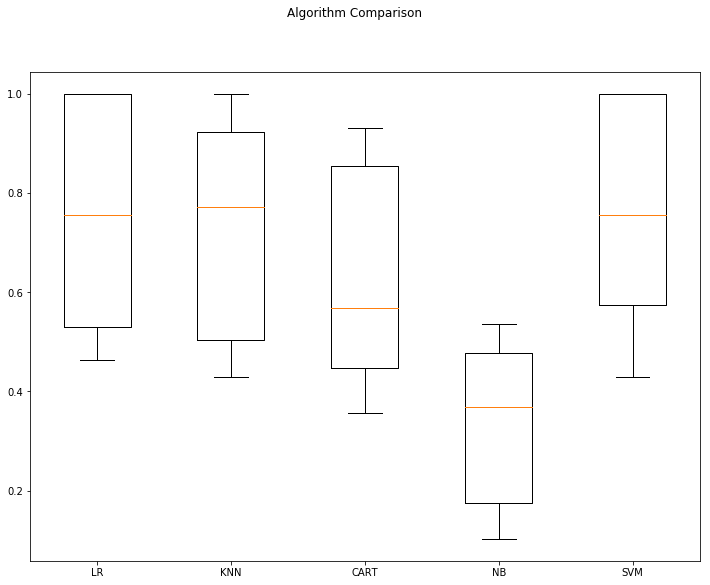

In [59]:
# Compare Algorithms spot checking
models = []
models.append(('LR', LogisticRegression(solver="newton-cg")))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f " % (name, cv_results.mean()*100)
    print(msg,'%')
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [93]:
test_size=0.3
seed=100
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='liblinear', penalty='l2', max_iter=1000, C=0.4 ,class_weight= {0:1,1:3})
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
cm = confusion_matrix(Y_test, predicted)
print(cm)
print(report)

[[53 18]
 [ 8  7]]
              precision    recall  f1-score   support

           0       0.87      0.75      0.80        71
           1       0.28      0.47      0.35        15

   micro avg       0.70      0.70      0.70        86
   macro avg       0.57      0.61      0.58        86
weighted avg       0.77      0.70      0.72        86



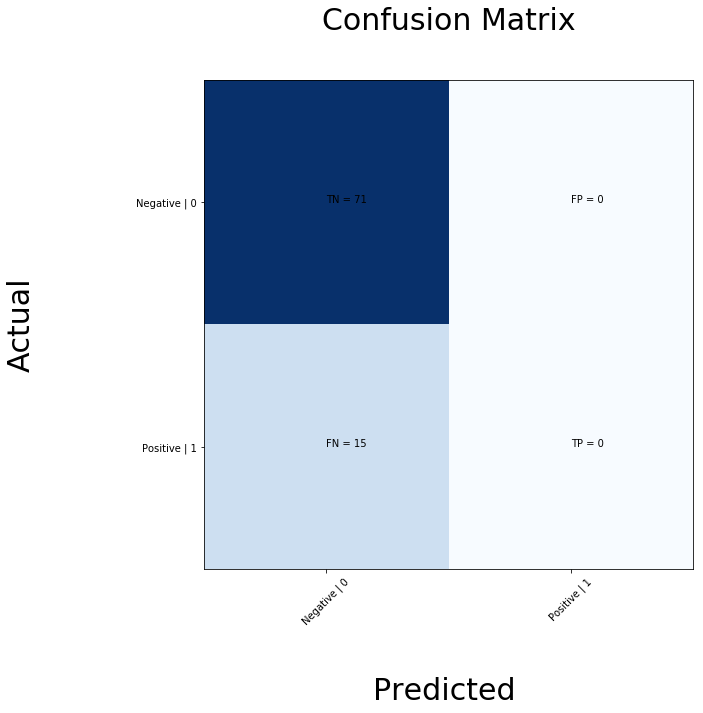

In [88]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative | 0','Positive | 1']
plt.title('Confusion Matrix', fontsize=30 ,pad=50 )
plt.ylabel('Actual' , labelpad=100 , fontsize=30)
plt.xlabel('Predicted ', labelpad=50 , fontsize=30)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()